# Import Dependencies

In [1]:
%run ./../../utilities/model_frameworks/bifrost_gradient_booster.ipynb

You should consider upgrading via the '/Users/deanmartin/miniforge3/bin/python -m pip install --upgrade pip' command.


# Examples

## Daily Bike Sharing Predictions (Time Series)

In [2]:
data = pd.read_csv('./../../data/daily_bike_sharing.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Extracted time series features from column "dteday" and dropped the original column.
Replaced all missing values with 0.
Dropping 2 columns due to only containing 1 or less unique values. -> ['t_hour', 't_minute']
Whitespace replaced with "_".
[Training] Matrix X: (584, 20), Matrix Y: (584, 1)
[Testing] Matrix X: (147, 20), Matrix Y: (147, 1)
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Hyperparameter optimization completed successfully.
[0]	cnt-rmse:4452.70893
[200]	cnt-rmse:1498.76193
[400]	cnt-rmse:1506.16450
[600]	cnt-rmse:1535.67001
[800]	cnt-rmse:1557.45709
[999]	cnt-rmse:1570.84378
[Testing] Matrix X: (147, 20), Matrix Y: (147, 1)
[Prediction] Matrix X: (147, 20), Matrix Y: (147, 1)
Mean Absolute Error: 1346.0765771152212 (1346.0765771152212 reverse-scaled.)
Mean Squared Error: 1570.8437757911033 (1570.8437757911033 reverse-scaled.)
MAPE: 185.0727240751112 (185.0727240751112 reverse-scaled.)


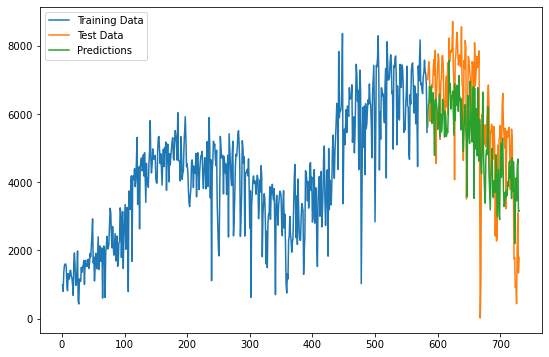

In [3]:
regressor = BifrostGradientBooster(data=data, 
                                   column_name_to_predict='cnt',
                                   data_time_column_name='dteday') \
    .fit(enable_hyperparameter_optimization=True) \
    .evaluate()

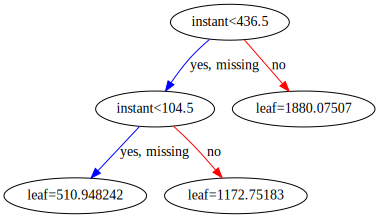

In [4]:
regressor.visualize(verbose=False)

## DOGE_BTC Price Prediction (Time Series)

In [15]:
data = pd.read_json('./../../data/DOGE_BTC-1h.json')
data.columns = [ 'time', 'open', 'high', 'low', 'close', 'volume' ]
data['time'] = pd.to_datetime(data['time'], unit='ms')
data.head()

,time,open,high,low,close,volume
0,2022-04-04 00:00:00,0.000003,0.000003,0.000003,0.000003,5925148
1,2022-04-04 01:00:00,0.000003,0.000003,0.000003,0.000003,1854562
2,2022-04-04 02:00:00,0.000003,0.000003,0.000003,0.000003,3641510
3,2022-04-04 03:00:00,0.000003,0.000003,0.000003,0.000003,3360431
4,2022-04-04 04:00:00,0.000003,0.000003,0.000003,0.000003,1936457


Global scaling has been set to 100000000.
Extracted time series features from column "time" and dropped the original column.
Replaced all missing values with 0.
Dropping 3 columns due to only containing 1 or less unique values. -> ['t_year', 't_minute', 't_quarter']
Whitespace replaced with "_".
[Training] Matrix X: (1157, 9), Matrix Y: (1157, 1)
[Testing] Matrix X: (290, 9), Matrix Y: (290, 1)
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Hyperparameter optimization completed successfully.
[0]	close-rmse:248.31236
[200]	close-rmse:4.30460
[400]	close-rmse:4.06428
[600]	close-rmse:4.42380
[800]	close-rmse:4.37991
[999]	close-rmse:4.08736
[Testing] Matrix X: (290, 9), Matrix Y: (290, 1)
[Prediction] Matrix X: (290, 9), Matrix Y: (290, 1)
Mean Absolute Error: 277.93447999026745 (2.7793447999026743e-06 reverse-scaled.)
Mean Squared Error: 278.006093666204 (2.7800609366620397e-06 reverse-scaled.)
MAPE: 99.99999900394873 (9.999999900394873e-07 reverse-scaled.)


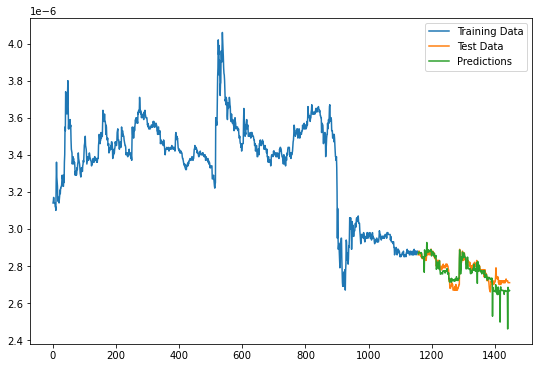

In [6]:
regressor = BifrostGradientBooster(data=data, 
                                   column_name_to_predict='close',
                                   data_time_column_name='time', 
                                   enable_global_scaling=True) \
    .fit(enable_hyperparameter_optimization=True) \
    .evaluate()

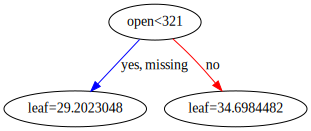

In [7]:
regressor.visualize(verbose=False)

## Titanic (Binary Classification)

In [8]:
data = pd.read_csv('./../../data/titanic.csv')
data.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


Replaced all missing values with 0.
Dropping 0 columns due to only containing 1 or less unique values. -> []
Whitespace replaced with "_".
One-Hot encoded 2 columns. -> ['PClass', 'Sex']
[Training] Matrix X: (1050, 6), Matrix Y: (1050, 1)
[Testing] Matrix X: (263, 6), Matrix Y: (263, 1)
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Hyperparameter optimization completed successfully.
[11:05:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "enable_categorical", "missing", "n_estimators", "use_label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Survived-auc:0.86265
[200]	Survived-auc:0.82388
[400]	Survived-auc:0.81316
[600]	Survived-au

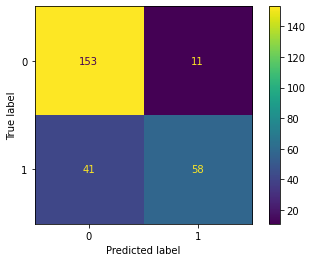

In [9]:
classifier = BifrostGradientBooster(data=data.drop(columns=[ 'Name' ]), 
                                   column_name_to_predict='Survived',
                                   use_binary_classifier=True) \
    .onehot_encode_categorical_columns(column_names=[ 'PClass', 'Sex' ]) \
    .fit(enable_hyperparameter_optimization=True) \
    .evaluate()

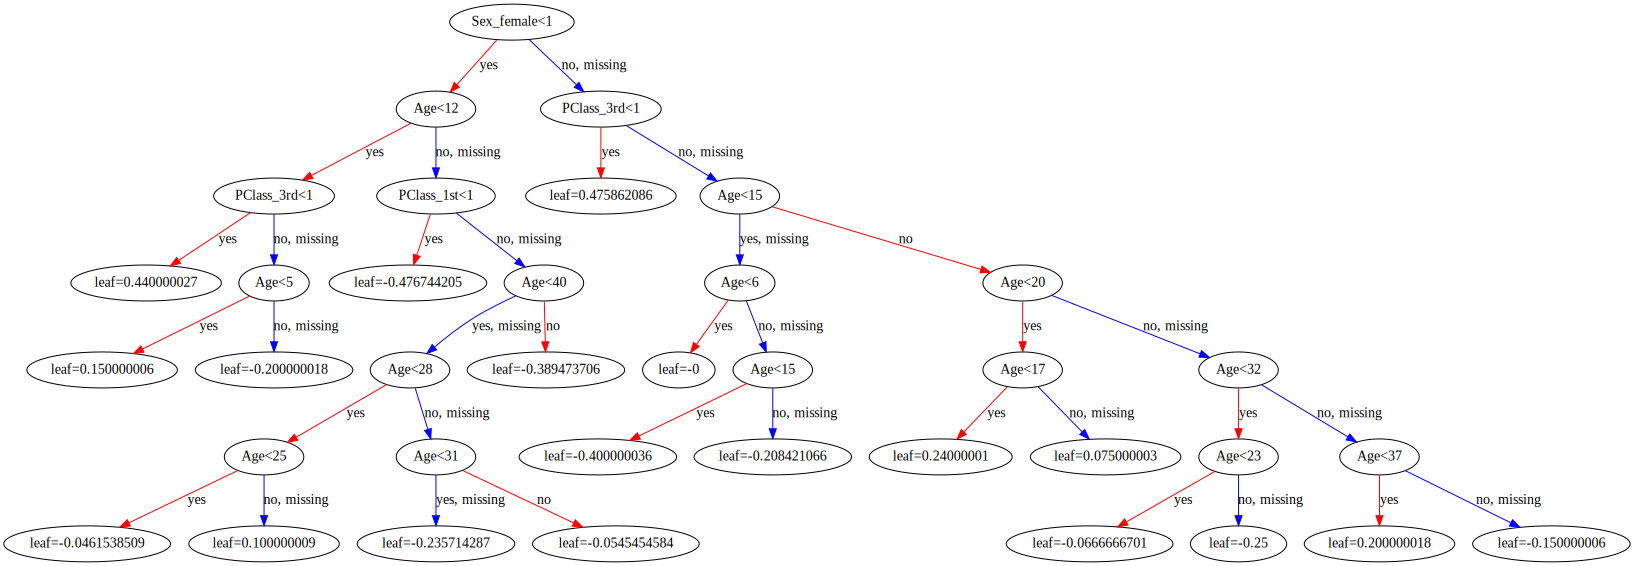

In [10]:
classifier.visualize(verbose=False)